### Домашенее задание №1 по предмету "Прикладное машинное обучение"

In [46]:
# Установим такие библиотеки как numpy, pandas, seaborn, matplotlib
%pip install numpy && pip install pandas && pip install seaborn && pip install matplotlib && pip install -U scikit-learn && pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 10.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Импортируем установленные ранее библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import plotly.express as ex
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

import warnings
warnings.filterwarnings('ignore')

### Бизнес постановка задачи:

Компания заказчик, продающая товары в области здравохранения и спорта требует проверить сколько людей страдают ожирением, на какие группы они деляться, а так же что их объединяет, какая между ними корелляция, чтобы понять, среди каких слоев населения товар будет более востребован, а так же чтобы выстроить качественную рекламную компанию на основе этих данных.

### Постановка ML задачи

На основе данных о людях с ожирением построить модель, которая определит, к какой группе относится больше всего людей с лишним весом. для более эффективной рекламной компании. Бинарная классификация.

### Выбор метрики

Метрика AUC-ROC имеет несколько преимуществ, которые делают ее хорошим инструментом для оценки производительности моделей бинарной классификации:

1. Учитывает полноту и специфичность: Кривая ROC обобщает производительность модели с учетом как ее способности правильно идентифицировать положительные классы (полноты), так и способности правильно идентифицировать отрицательные классы (специфичности). Это позволяет оценить общую способность модели сбалансированно работать как с одним классом, так и с другим.

2. Не чувствительна к несбалансированным данным: AUC-ROC метрика надежно работает с несбалансированными данными, что делает ее важной в реальных задачах, где классы могут быть неодинаково представлены в данных.

3. Подходит для оценки и сравнения моделей: AUC-ROC позволяет сравнивать производительность различных моделей бинарной классификации на одних и тех же данных, что помогает выбрать лучшую модель для конкретной задачи.

4. Независима от порога классификации: AUC-ROC не зависит от выбора конкретного порога для разделения положительных и отрицательных классов, в отличие от других метрик (например, точность, F-мера и др.), что делает ее более устойчивой к несбалансированным классам.

### EDA

Рассмотрим приведенные данные:

Данные содержат.

Пол равен 1, если респондент мужчина, и 0, если респондент женщина.

Возраст – возраст респондента в годах.

Family_history_with_overweight имеет значение 1, если у респондента есть член семьи, который имеет или имел избыточный вес, и 0, если нет.

FAVC равен 1, если респондент часто ест высококалорийную пищу, и 0, если нет.

FCVC равен 1, если респондент обычно употребляет в пищу овощи, и 0, если нет.

NCP показывает, сколько основных приемов пищи респондент принимает в день (0 для 1-2-разового питания, 1 для 3-разового питания и 2 для более чем 3-разового питания).

CAEC показывает, сколько еды респондент съедает между приемами пищи, по шкале от 0 до 3.

SMOKE равен 1, если респондент курит, и 0, если нет.

CH2O показывает, сколько воды выпивает респондент, по шкале от 0 до 2.

SCC равен 1, если респондент следит за потреблением калорий, и 0, если нет.

FAF показывает, какую физическую активность выполняет респондент по шкале от 0 до 3.

TUE показывает, сколько времени респондент проводит, глядя на устройства с экранами, по шкале от 0 до 2.

CALC показывает, как часто респондент употребляет алкоголь по шкале от 0 до 3.

«Автомобиль», «Велосипед», «Мотоцикл», «Общественный_транспорт» и «Ходьба» указывают на основной вид транспорта респондента. Их основной вид транспорта обозначен цифрой 1, а остальные столбцы будут содержать 0.

NObeyesdad равен 1, если пациент страдает ожирением, и 0, если нет.

In [48]:
df = pd.read_csv('obesity.csv')
df.head(15)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0
8,1,24.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,0,0,0,1,0,0
9,1,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,0,0,0,1,0,0


In [49]:
print("Размер выобрки: " + str(df.shape[0]))

Размер выобрки: 2111


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [51]:
df.rename(columns = {"NObeyesdad": "Obese"}, inplace =True)

In [52]:
# Проверим число строк и столбцов в нашей выборке
rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 2111
Columns: 19


In [53]:
# Проверим дублируемость данных
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 29


In [54]:
# Удалим дублируещиеся данные и проверим на дублирование еще раз
df.drop_duplicates(keep=False,inplace=True)
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [55]:
# Число уникальных значений в колонках
df.nunique()

Gender                               2
Age                               1402
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
Automobile                           2
Bike                                 2
Motorbike                            2
Public_Transportation                2
Walking                              2
Obese                                2
dtype: int64

In [56]:
# Проверим уникальные значения и частоту запроса NObeyesdad.
df['Obese'].value_counts()

Obese
0    1096
1     972
Name: count, dtype: int64

#### Визуализация данных

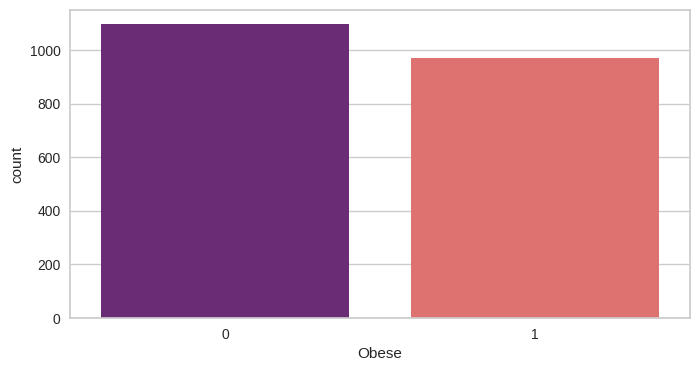

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Obese"], palette="magma")
plt.show()

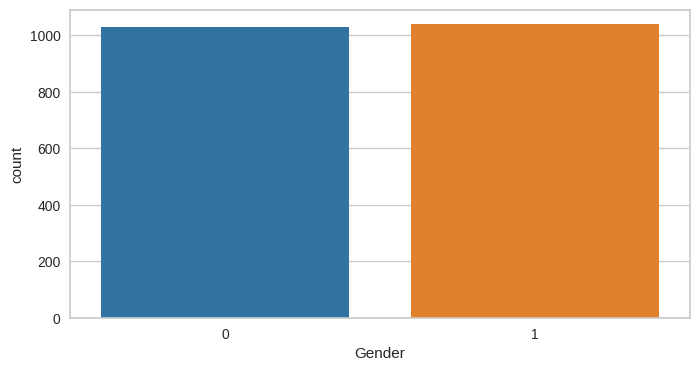

In [58]:
# Пол

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["Gender"], palette="tab10")
plt.show()

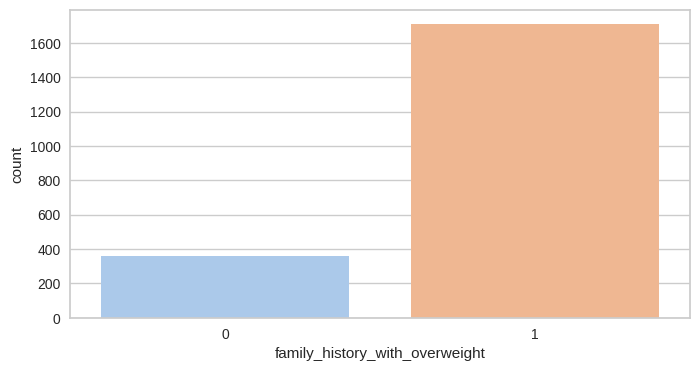

In [59]:
# Семейная предрасположенность

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["family_history_with_overweight"], palette="pastel")
plt.show()

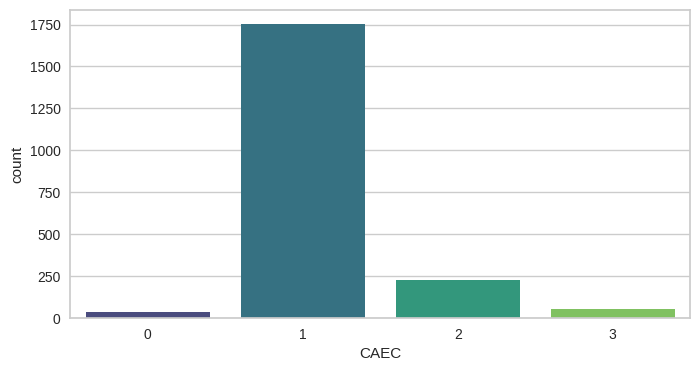

In [60]:
# Употребление еды между приемами пищи от 0 до 3

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df["CAEC"], palette="viridis")
plt.show()

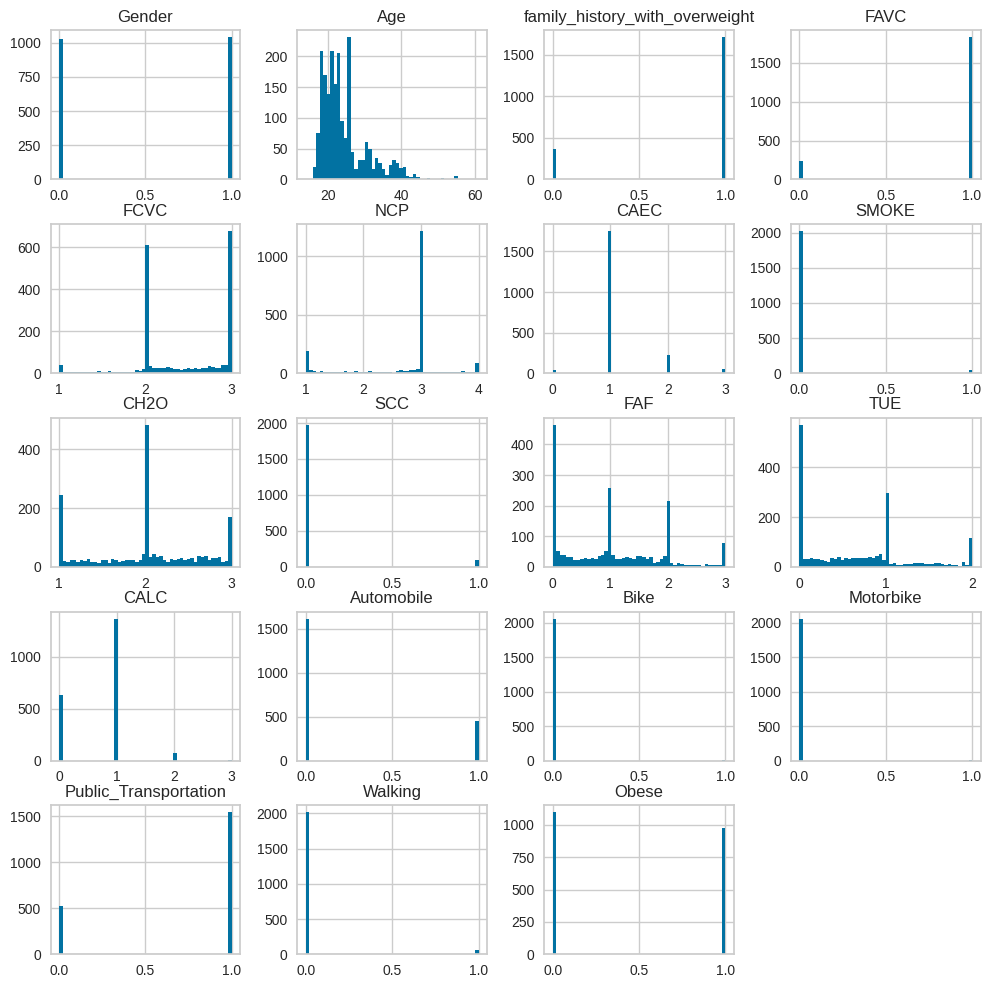

In [61]:
# Гистограммы датасета

df.hist(bins=50, figsize=(12,12))
plt.show()

###  Вывод:

В глаза сразу же бросается, что хорошим вариантом для данной компании, будет продвижение своей рекламы и товаров в интернете, их целевая аудитория это в основном молодые люди, у которых есть предрасположенность семейная, которые почти не двигаются и сидят дома по данным FAF, либо пользуются общественным транспортом и не следят за каллорийностью.

### Разбиение данных на тренировочную и тестовую выборки

In [62]:
# Создадим и назначим перменные X и y
X,y=df.drop("Obese",axis=1),df[['Obese']]

Далее мы разделим данные на тестовую и тренировочную выборку.

Думаю, что такое разбиение будет лучше всего для нашего случая, что не даст лишних утечек данных.

Так же зафиксируем random_state, который будет равен 123.

In [63]:
from sklearn.model_selection import train_test_split

# Разделение данных для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1654, 18), (414, 18), (1654, 1), (414, 1))

### Обучение моделей

#### Модель с константным ответом

In [64]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

model = DummyClassifier(strategy='most_frequent')

model.fit(X_train, y_train)
print("Результат: ")
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Результат: 
0.5


Для любой константной модели метрика ROC AUC будет равно 0.5, несмотря на дисбаланс классов.

#### Простые модели

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()
d=DecisionTreeClassifier()

g.fit(X_train,y_train)
b.fit(X_train,y_train)
k.fit(X_train,y_train)
l.fit(X_train,y_train)
d.fit(X_train,y_train)

predG=g.predict(X_train)
predB=b.predict(X_train)
predK=k.predict(X_train)
predL=l.predict(X_train)
predD=d.predict(X_train)


In [66]:
# Вывести 'accuracy scores'

print('Accuracy Scores:')
print("GaussianNB:       ", accuracy_score(predG,y_train))
print("BernoulliNB:      ", accuracy_score(predB,y_train))
print("KNeighbours:      ", accuracy_score(predK,y_train))
print("LogisticReg:      ", accuracy_score(predL,y_train))
print("DecisionTree:     ", accuracy_score(predD,y_train))

Accuracy Scores:
GaussianNB:        0.7551390568319226
BernoulliNB:       0.7212817412333736
KNeighbours:       0.9177750906892382
LogisticReg:       0.7750906892382105
DecisionTree:      1.0


### Сложные модели

Попробуем так же замерить показатели модели RandomForestClassifier.

In [67]:
from sklearn.ensemble import RandomForestClassifier

r=RandomForestClassifier()

r.fit(X_train,y_train)

predR=r.predict(X_train)

In [68]:
# Вывести 'accuracy scores'
print("RandomForest:     ", accuracy_score(predR,y_train))

RandomForest:      1.0


Хотя обе модели (RandomForestClassifier и DecisionTreeClassifier) получили оценку точности 1, есть несколько причин, по которым я выбрал RandomForestClassifier:

1)Случайный лес — это метод ансамблевого обучения, который объединяет несколько деревьев решений для улучшения общей производительности и уменьшения переобучения. Это означает, что даже если одно дерево в лесу допустит ошибку, другие деревья смогут ее исправить, что приведет к более надежным прогнозам.

2)Случайный лес использует пакетирование (агрегирование начальной загрузки) для создания нескольких подмножеств исходных данных, которые затем используются для обучения отдельных деревьев. Это помогает уменьшить дисперсию модели и улучшить ее обобщение на новые данные.

3)Случайный лес также использует случайность объектов, при которой для разделения на каждом узле рассматривается только случайное подмножество объектов. Это помогает декоррелировать деревья и еще больше уменьшить переобучение.

### Вывод:

Самым лучшим вариантом будет выбрать модель RandomForest, потому что она показала наилучший результат.

Случайный лес — популярный алгоритм машинного обучения, относящийся к методу обучения с учителем. Его можно использовать как для задач классификации, так и для задач регрессии. 

Вот некоторые плюсы случайного леса:

1)Переобучение: случайный лес — это метод ансамблевого обучения, который работает путем построения множества деревьев решений во время обучения и вывода класса, который является режимом классов (классификация) или средним предсказанием (регрессия) отдельных деревьев. Этот процесс усреднения помогает уменьшить переобучение.

2)Важность объекта: случайный лес обеспечивает меру важности объекта, которую можно использовать для определения наиболее важных объектов в наборе данных.

3)Надежность: Random Forest — это надежный алгоритм, который может обрабатывать зашумленные данные и выбросы.

4)Масштабируемость: Random Forest может обрабатывать большие наборы данных высокой размерности.

Минусы:

1)Время обучения: обучение случайному лесу может быть медленным, поскольку оно предполагает построение нескольких деревьев решений.

2)Интерпретируемость: случайный лес не так интерпретируем, как некоторые другие алгоритмы машинного обучения, такие как логистическая регрессия или деревья решений.

3)Использование памяти. Случайный лес может использовать много памяти, особенно при работе с большими наборами данных.

Думаю в данном случае мы готовы мирится с минусами и можем смело выбрать данный алгоритм машинного обучения.


### Сложная модель

В качестве сложной модели выбрали RandomForestClassifier, по причинам описанным выше.

Определим x и y параметры. Зафиксируем random_state = 123.

In [70]:
# Параметры X и y
y = df["Obese"]
X = df.drop("Obese", axis="columns")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1654, 18), (414, 18), (1654, 1), (414, 1))

In [71]:
# RandomForestClassifier

# создаем экземпляр классификатора
rfc = RandomForestClassifier(criterion="gini", min_samples_split=2)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# Прогнозирование результатов набора тестов
y_pred = rfc.predict(X_test)

In [73]:
# Проверим accurency 

from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9420


Проверим производительность алгоритма с помощью матрицы ошибок.

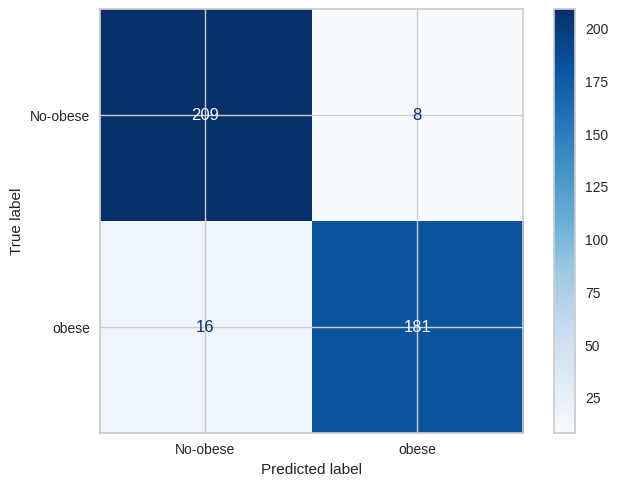

In [74]:
# Матрица ошибок

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize = None, display_labels = ['No-obese', 'obese'])

Стоит попробовать уменьшить колчинество прогнозов Obesse это No-Obesse предсказания. Это нехорошо, когда дело касается медицины.

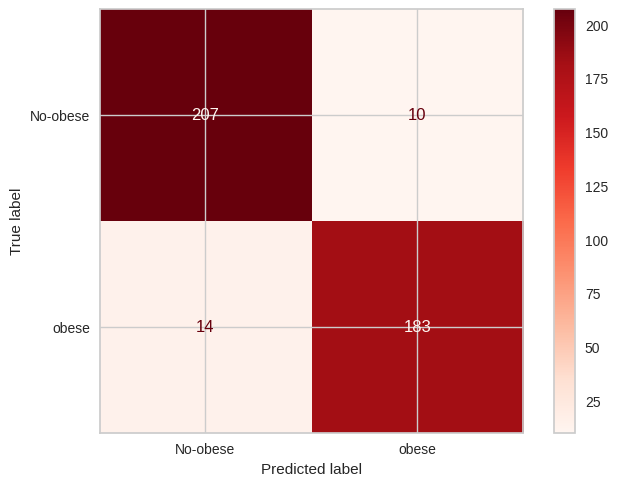

In [75]:
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(random_state=42)
brfc.fit(X_train, y_train)
y_pred = brfc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Reds, normalize = None, display_labels = ['No-obese', 'obese'])

Сейчас мы сузили прогноз о том, что obese это No-obese.


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       217
           1       0.95      0.93      0.94       197

    accuracy                           0.94       414
   macro avg       0.94      0.94      0.94       414
weighted avg       0.94      0.94      0.94       414



In [77]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.95      0.93      0.95      0.94      0.89       217
          1       0.95      0.93      0.95      0.94      0.94      0.88       197

avg / total       0.94      0.94      0.94      0.94      0.94      0.89       414



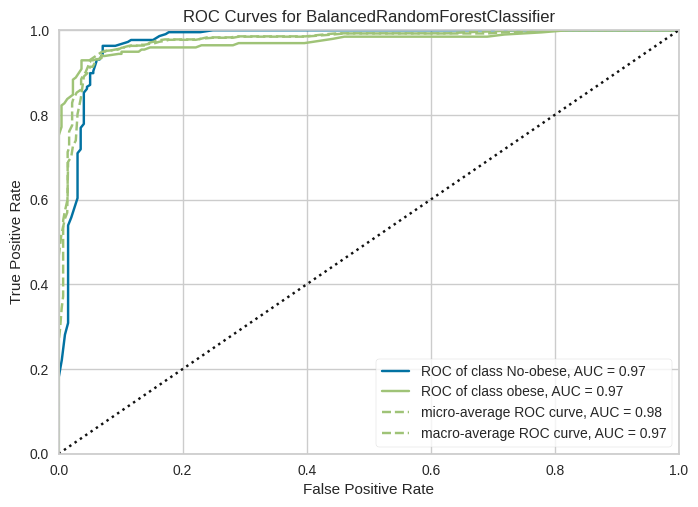

<Axes: title={'center': 'ROC Curves for BalancedRandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [78]:
# ROCAUC
visualizer_ROCAUC = ROCAUC(brfc, classes=["No-obese", "obese"])

visualizer_ROCAUC.fit(X_train, y_train)       
visualizer_ROCAUC.score(X_test, y_test)        
visualizer_ROCAUC.show() 

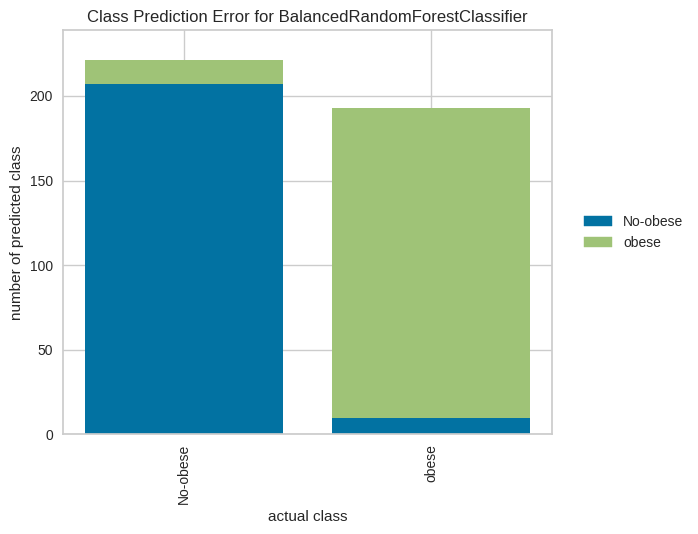

<Axes: title={'center': 'Class Prediction Error for BalancedRandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [79]:
from yellowbrick.classifier import ClassPredictionError

visualizer_Error = ClassPredictionError(brfc, classes=["No-obese", "obese"])

visualizer_Error.fit(X_train, y_train)        
visualizer_Error.score(X_test, y_test)        
visualizer_Error.show() 

### Значимость признаков

Укажем признаки и отобразим их по важности на графике, чтобы было видно, что сильнее всего будет влиять на ожирение и набор человеком лишнего веса.

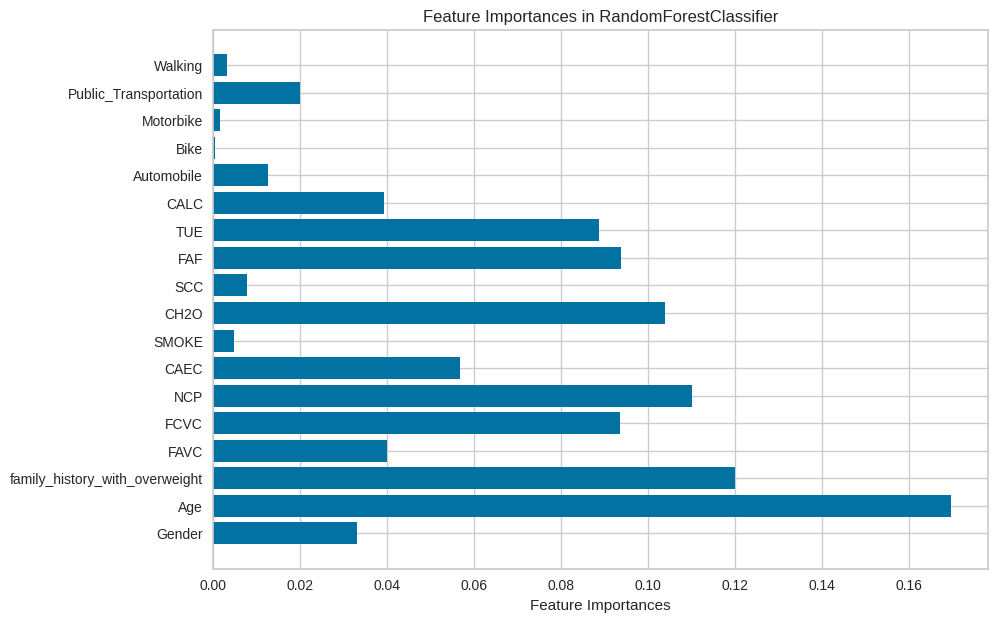

In [80]:
feature_names = rfc.feature_names_in_
feature_importances = rfc.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importances")
plt.show()

### Вывод по параметрам

Самыми важными параметрами в вопросе набора человеком лшнего веса являются Возраст и Семейная прдрасположенность к лишнему весу, так же важными стали параметры потребления еды и воды в течении суток, а так же сколько человек активничает в день и сидит на против девайсов.

### Общие выводы

Исследование показало интересный результат, он был ожидаемым и исследование его подтвердило. 